In [9]:
from brainlit.utils.session import NeuroglancerSession
from brainlit.utils.swc import graph_to_paths
import napari

In [10]:
dir = "s3://open-neurodata/brainlit/brain1"
dir_segments = "s3://open-neurodata/brainlit/brain1_segments"

In [163]:
# Create a dictionary of [segment IDs, images] for each cell in 'dir' using 'pull_voxel'
mydict = {'seg_ids':[], 'imgs':[]}
ngl_sess = NeuroglancerSession(url=dir, url_segments=dir_segments, mip=1)
for i in range(1000):
    try:
        # pull_voxel(seg_id, v_id, radius)
        img, bbox, idx = ngl_sess.pull_voxel(i, 0, 15) 
        # img: 2*nx+1 X 2*ny+1 X 2*nz+1 volume
        mydict['seg_ids'].append(i)
        mydict['imgs'].append(img)
    except:
        pass

Downloading: 100%|██████████| 1/1 [00:00<00:00, 25.59it/s]


Downloading:   0%|          | 0/4 [00:00<?, ?it/s]


Downloading: 100%|██████████| 1/1 [00:00<00:00, 12.52it/s]


Downloading: 100%|██████████| 1/1 [00:00<00:00, 29.80it/s]


Downloading: 100%|██████████| 1/1 [00:00<00:00, 25.17it/s]


Downloading: 100%|██████████| 1/1 [00:00<00:00, 31.18it/s]


Downloading: 100%|██████████| 1/1 [00:00<00:00, 30.77it/s]


Downloading: 100%|██████████| 1/1 [00:00<00:00, 33.11it/s]


Downloading:   0%|          | 0/2 [00:01<?, ?it/s]


In [445]:
# NOW EACH ELEMENT OF THE DICT IS 178 VOLUMES (31x31x31) 

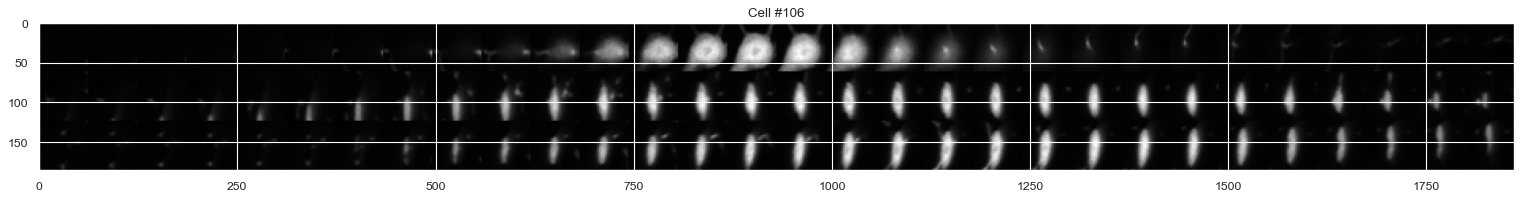

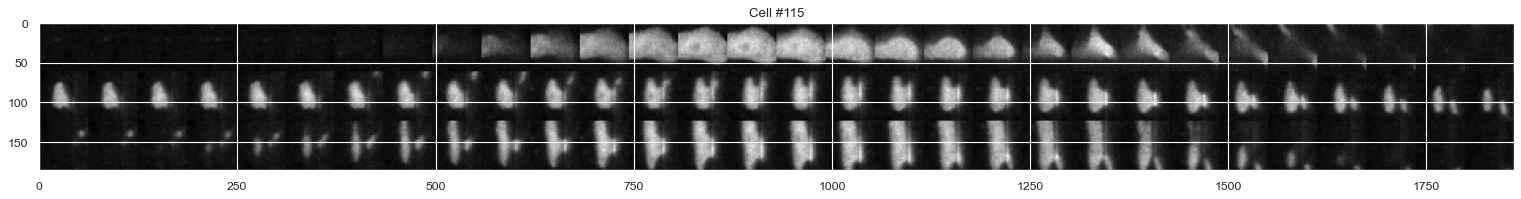

In [439]:
# show a couple of 3D visualizations from 'mydict'
from brainlit.viz.visualize import plot_3d
import SimpleITK as sitk
for i in [40,45]:
    img = sitk.GetImageFromArray(mydict['imgs'][i])
    plot_3d(img, range(30), range(30), range(30), title="Cell #" + str(mydict["seg_ids"][i]))

<Figure size 864x576 with 0 Axes>

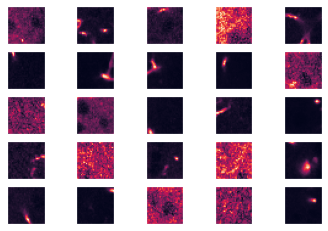

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(12,8))
fig, ax = plt.subplots(5,5)
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(mydict['imgs'][5*i+j][:,:,30])
        ax[i,j].axes.xaxis.set_visible(False)
        ax[i,j].axes.yaxis.set_visible(False)
plt.show()
# plt.savefig()
# make a gif, this image for every slice in increasing value from 0 to 20

In [428]:
# napari vizualizations to inspect individuals
with napari.gui_qt():
    viewer = napari.Viewer(ndisplay=3)
#     viewer.add_image(mydict['imgs'][0]
    viewer.add_image(vol)

In [427]:
# Thresholding algo
import numpy as np

cell = 5
MAX = np.amax(mydict['imgs'][cell][:,:,:])
MIN = np.amin(mydict['imgs'][cell][:,:,:])

thresh = .8
vol = np.ndarray(shape=(31,31,31))
for x in range(mydict['imgs'][cell][:,30,30].size):
    for y in range(mydict['imgs'][cell][30,:,30].size):
        for z in range(mydict['imgs'][cell][30,30,:].size):

            vol[x,y,z] = (MAX - mydict['imgs'][cell][x,y,z]) / (MAX - MIN)
            if vol[x,y,z] < thresh:
                vol[x,y,z] = 0
            else:
                #vol[x,y,z] = 1
                pass

In [322]:
# create GIF of volume
import imageio
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('/path/to/movie.gif', images)

(100, 3)

In [429]:
# #  plot 3D figure
# from mpl_toolkits import mplot3d
# # %matplotlib notebook
# %matplotlib inline
# fig = plt.figure()
# ax = plt.axes(projection='3d')

# # Data for a three-dimensional line
# ax.plot3D(vol[:,:], 'gray')

# # Data for three-dimensional scattered points
# zdata = 15 * np.random.random(100)
# xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
# ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');